In [2]:
from datetime import datetime
import pandas as pd
from sodapy import Socrata
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("healthdata.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(healthdata.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("g62h-syeh", limit=50000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

ReadTimeout: HTTPSConnectionPool(host='healthdata.gov', port=443): Read timed out. (read timeout=10)

In [37]:
results_df.columns.values

array(['state', 'date', 'critical_staffing_shortage_today_yes',
       'critical_staffing_shortage_today_no',
       'critical_staffing_shortage_today_not_reported',
       'critical_staffing_shortage_anticipated_within_week_yes',
       'critical_staffing_shortage_anticipated_within_week_no',
       'critical_staffing_shortage_anticipated_within_week_not_reported',
       'hospital_onset_covid', 'hospital_onset_covid_coverage',
       'inpatient_beds', 'inpatient_beds_coverage', 'inpatient_beds_used',
       'inpatient_beds_used_coverage', 'inpatient_beds_used_covid',
       'inpatient_beds_used_covid_coverage',
       'previous_day_admission_adult_covid_confirmed',
       'previous_day_admission_adult_covid_confirmed_coverage',
       'previous_day_admission_adult_covid_suspected',
       'previous_day_admission_adult_covid_suspected_coverage',
       'previous_day_admission_pediatric_covid_confirmed',
       'previous_day_admission_pediatric_covid_confirmed_coverage',
       'previo

1 - ¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común. Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 - recuerde incluir la cifra de infectados en esos meses (acumulativo). ¿Influye el rango etario en este comportamiento?

In [38]:
ocupacion_estados = results_df[['date','state', 'inpatient_beds','inpatient_beds_used','inpatient_beds_used_covid','previous_day_admission_adult_covid_confirmed','previous_day_admission_pediatric_covid_confirmed','hospital_onset_covid']]

In [39]:
ocupacion_estados.dtypes

date                                                object
state                                               object
inpatient_beds                                      object
inpatient_beds_used                                 object
inpatient_beds_used_covid                           object
previous_day_admission_adult_covid_confirmed        object
previous_day_admission_pediatric_covid_confirmed    object
hospital_onset_covid                                object
dtype: object

In [40]:
#ocupacion_estados = ocupacion_estados.astype({'inpatient_bed_covid_utilization':'int','inpatient_beds_used':'int'})
#ocupacion_estados['inpatient_bed_covid_utilization'] = ocupacion_estados['inpatient_bed_covid_utilization'].fillna(0).astype(int)
#_ocupacion_estados['inpatient_beds_used'] = ocupacion_estados['inpatient_beds_used'].fillna(0).astype(int)
ocupacion_estados['inpatient_beds'] = pd.to_numeric(ocupacion_estados['inpatient_beds'])
ocupacion_estados['inpatient_beds_used'] = pd.to_numeric(ocupacion_estados['inpatient_beds_used'])
ocupacion_estados['inpatient_beds_used_covid'] = pd.to_numeric(ocupacion_estados['inpatient_beds_used_covid'])
ocupacion_estados['previous_day_admission_adult_covid_confirmed'] = pd.to_numeric(ocupacion_estados['previous_day_admission_adult_covid_confirmed'])
ocupacion_estados['previous_day_admission_pediatric_covid_confirmed'] = pd.to_numeric(ocupacion_estados['previous_day_admission_pediatric_covid_confirmed'])
ocupacion_estados['hospital_onset_covid'] = pd.to_numeric(ocupacion_estados['hospital_onset_covid'])


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_2836\3206550128.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocupacion_estados['inpatient_beds'] = pd.to_numeric(ocupacion_estados['inpatient_beds'])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_2836\3206550128.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocupacion_estados['inpatient_beds_used'] = pd.to_numeric(ocupacion_estados['inpatient_beds_used'])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_2836\320

In [13]:
#ocupacion_estados['ocupacion'] = ocupacion_estados['inpatient_beds'] - ocupacion_estados['inpatient_beds_used']

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_14904\4078632915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocupacion_estados['ocupacion'] = ocupacion_estados['inpatient_beds'] - ocupacion_estados['inpatient_beds_used']


In [8]:
ocupacion_estados['date'] = pd.to_datetime(ocupacion_estados['date'])
#pd.to_datetime

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_2836\49131501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocupacion_estados['date'] = pd.to_datetime(ocupacion_estados['date'])


In [7]:
def convertir_str_date(cadena):
    
    fecha_format = datetime.strptime(cadena, '%Y-%m-%d')
    return(fecha_format)

In [9]:
#ocupacion_estados.head()
#import datetime as dt
#from datetime import datetime
#fecha_ini = '2020-01-01'
#fecha_fin = '2020-06-31'
#print(convertir_str_date(fecha_ini))
#ocupacion_estados_2020 = ocupacion_estados[(ocupacion_estados['date'] >= convertir_str_date(fecha_ini) & ocupacion_estados['date'] <= convertir_str_date(fecha_fin))]
ocupacion_estados_2020=ocupacion_estados.query("date >= '2020-01-01' and date <='2020-06-30'")

In [10]:
ocupacion_estados_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6694 entries, 52 to 21593
Data columns (total 8 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   date                                              6694 non-null   datetime64[ns]
 1   state                                             6694 non-null   object        
 2   inpatient_beds                                    6689 non-null   float64       
 3   inpatient_beds_used                               6441 non-null   float64       
 4   inpatient_beds_used_covid                         6610 non-null   float64       
 5   previous_day_admission_adult_covid_confirmed      508 non-null    float64       
 6   previous_day_admission_pediatric_covid_confirmed  194 non-null    float64       
 7   hospital_onset_covid                              6460 non-null   float64       
dtypes: datetime64[ns](1), float

In [11]:
#ocupacion_estados.[ocupacion_estados['ocupacion']]
estados_max_ocup = ocupacion_estados_2020.sort_values(by=['inpatient_beds_used_covid'],ascending=False)
#diasmaxBrecha.sort_values(by=['FECHA'],inplace=True)
#resp01 = ocupacion_estados_2020[ocupacion_estados_2020['ocupacion']==estados_max_ocup]
#resp01
#by_week_max = pd.DataFrame(df_v2.groupby(['ANIOSEMANA'])['Diferencia'].apply(lambda x : x.astype('float64').max()))
filtro_estados_2020 = pd.DataFrame(ocupacion_estados_2020.groupby('state')['inpatient_beds_used_covid'].sum().sort_values(ascending=False)).head(5)
#filtro_estados_2020.sort_values(by='state',inplace=True)
filtro_estados_2020


,inpatient_beds_used_covid
state,
NY,686528.0
CA,434721.0
FL,322227.0
TX,246237.0
IL,214010.0


In [12]:
infectados = pd.DataFrame(ocupacion_estados_2020.groupby('state')['inpatient_beds_used_covid','hospital_onset_covid'].sum().sort_values(by='inpatient_beds_used_covid', ascending=False)).head(5)
infectados

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_2836\1751219551.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  infectados = pd.DataFrame(ocupacion_estados_2020.groupby('state')['inpatient_beds_used_covid','hospital_onset_covid'].sum().sort_values(by='inpatient_beds_used_covid', ascending=False)).head(5)


,inpatient_beds_used_covid,hospital_onset_covid
state,,
NY,686528.0,5569.0
CA,434721.0,5499.0
FL,322227.0,6411.0
TX,246237.0,7703.0
IL,214010.0,1498.0


2 - Analice la ocupación de camas (Común) por COVID en el Estado de Nueva York durante la cuarentena establecida e indique:

Intervalos de crecimiento y decrecimiento
Puntos críticos (mínimos y máximos)

In [16]:
filtroNY = ocupacion_estados_2020['state'] == 'NY'
OnlyNY = ocupacion_estados_2020[filtroNY]

In [26]:
y_NY = OnlyNY['inpatient_beds_used_covid']
x_NY = OnlyNY['date']

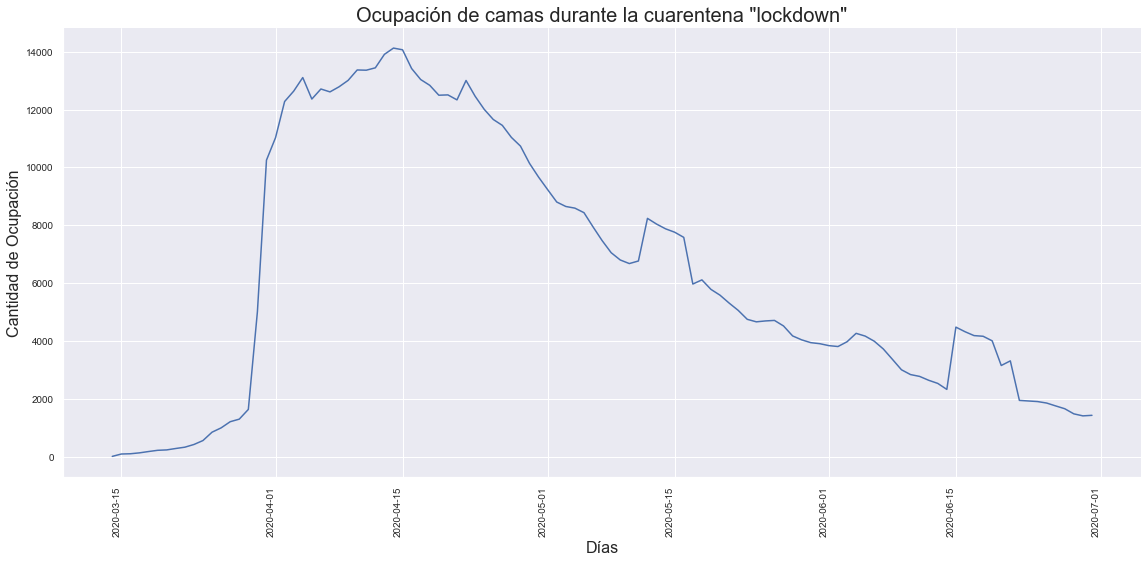

In [34]:
#sns.lineplot(y_NY,x_NY)
sns.set_theme(style="darkgrid", context="talk")
sns.set(font_scale=0.9)
gNY = sns.relplot(data=OnlyNY, y=y_NY,x=x_NY,
                        height= 8,
                        aspect=2, kind='line')

gNY.figure.autofmt_xdate(rotation=90)
plt.xlabel('Días', fontsize=16)
plt.ylabel('Cantidad de Internaciones', fontsize=16)
plt.title('Ocupación de camas durante la cuarentena "lockdown"', fontsize=20)
plt.show();

In [140]:
OnlyNY.iplot(kind='bar',x='date',y='inpatient_beds_used_covid', xTitle='Fecha',yTitle='Cantidad de Internaciones',title='Ocupación de camas durante la cuarentena "lockdown"')

In [60]:
estados_icu_util = results_df[['date','state', 'staffed_adult_icu_bed_occupancy_coverage']]
estados_icu_util['date'] = pd.to_datetime(estados_icu_util['date'])
estados_icu_util['staffed_adult_icu_bed_occupancy_coverage']= pd.to_numeric(estados_icu_util['staffed_adult_icu_bed_occupancy_coverage'])
#estados_icu_util.head()
#estados_icu_util_2020 = estados_icu_util.query("date >= '2020-01-01' and date <='2020-12-31'").groupby('state')['staffed_adult_icu_bed_occupancy_coverage'].sum()
estados_icu_util_2020 = estados_icu_util.query("date >= '2020-01-01' and date <='2020-12-31'").groupby('state')['staffed_adult_icu_bed_occupancy_coverage'].sum().sort_values(ascending=False).head(5)
estados_icu_util_2020
#resp3 = pd.DataFrame(estados_icu_util_2020.groupby('state')['staffed_adult_icu_bed_occupancy_coverage'].sum())
#infectados = pd.DataFrame(ocupacion_estados_2020.groupby('state')['inpatient_beds_used_covid','hospital_onset_covid'].sum().sort_values(by='inpatient_beds_used_covid', ascending=False)).head(5)
#resp3


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_2836\3806398453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estados_icu_util['date'] = pd.to_datetime(estados_icu_util['date'])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_2836\3806398453.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estados_icu_util['staffed_adult_icu_bed_occupancy_coverage']= pd.to_numeric(estados_icu_util['staffed_adult_icu_bed_occupancy_coverage'])


state
TX    92645
CA    63140
FL    42304
OH    32940
PA    31315
Name: staffed_adult_icu_bed_occupancy_coverage, dtype: int64

In [84]:
pedriatricos = results_df[['date','state', 'total_pediatric_patients_hospitalized_confirmed_covid_coverage']]
pedriatricos['date'] = pd.to_datetime(pedriatricos['date'])
pedriatricos['total_pediatric_patients_hospitalized_confirmed_covid_coverage']= pd.to_numeric(pedriatricos['total_pediatric_patients_hospitalized_confirmed_covid_coverage'])
pedriatricos.head()
pediatricos_2020 = pedriatricos.query("date >= '2020-01-01' and date <='2020-12-31'")
a = pediatricos_2020.groupby('state')['total_pediatric_patients_hospitalized_confirmed_covid_coverage'].sum().sort_values(ascending=False).head(5)
#a
pediatricos_2020

x_pedriatricos = pediatricos_2020['date']
y_pediatricos = pediatricos_2020['total_pediatric_patients_hospitalized_confirmed_covid_coverage']
sns.set_theme(style="darkgrid", context="talk")
sns.set(font_scale=1.5)
gNY = sns.relplot(data=pediatricos_2020, x='date',y='total_pediatric_patients_hospitalized_confirmed_covid_coverage',
                        hue=a.index.values,
                        height= 8,
                        aspect=2, kind='line')

gNY.figure.autofmt_xdate(rotation=90)
plt.xlabel('Estados', fontsize=16)
plt.ylabel('Camas Ocupadas', fontsize=16)
plt.title('Ocupación de camas de Unidad de Cuidados Intensivos (UCI) durante el 2020', fontsize=20)
plt.show();
#st.pyplot(gNY)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_2836\4080908971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedriatricos['date'] = pd.to_datetime(pedriatricos['date'])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_2836\4080908971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedriatricos['total_pediatric_patients_hospitalized_confirmed_covid_coverage']= pd.to_numeric(pedriatricos['total_pediatric_patients_hospitalized_confirmed_covid_coverage'])


ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 16446 and the vector passed to `hue` has length 5.

In [ ]:
#df_mask=df['Sales']==300
#filtered_df = df[df_mask]
mascara = ((pediatricos_2020['state'] == a.index[0]) or (pediatricos_2020['state'] == a.index[1]))
#mascara
print(a.index[0])
print(a.index[1])
print(a.index[2])
print(a.index[3])
print(a.index[4])


In [101]:
mascara = pediatricos_2020[pediatricos_2020['state'].isin(a.index)]
#print(df)
#pediatricos_2020[mascara]
mascara

,date,state,total_pediatric_patients_hospitalized_confirmed_covid_coverage
588,2020-07-19,PA,118
598,2020-06-24,OH,0
608,2020-06-23,OH,0
631,2020-10-14,CA,389
636,2020-11-19,TX,580
...,...,...,...
43306,2020-12-31,TX,585
44958,2020-12-31,CA,410
45149,2020-12-29,TX,582
46210,2020-12-29,PA,185


In [131]:
pedriatricos = results_df[['date','state', 'total_pediatric_patients_hospitalized_confirmed_covid_coverage']]
pedriatricos['date'] = pd.to_datetime(pedriatricos['date'])
pedriatricos['total_pediatric_patients_hospitalized_confirmed_covid_coverage']= pd.to_numeric(pedriatricos['total_pediatric_patients_hospitalized_confirmed_covid_coverage'])
pedriatricos.head()
pediatricos_2020 = pedriatricos.query("date >= '2020-01-01' and date <='2020-12-31'")
mascara = pediatricos_2020.groupby('state')['total_pediatric_patients_hospitalized_confirmed_covid_coverage'].sum().sort_values(ascending=False).head(5)
#a
pediatricos_2020

x_pedriatricos = mascara['date']
y_pediatricos = mascara['total_pediatric_patients_hospitalized_confirmed_covid_coverage']
sns.set_theme(style="darkgrid", context="talk")
sns.set(font_scale=1.5)
gNY = sns.relplot(data=mascara, x=x_pedriatricos,y=y_pediatricos,
                        hue='state',
                        height= 8,
                        aspect=2, kind='line')

gNY.figure.autofmt_xdate(rotation=90)
plt.xlabel('Estados', fontsize=16)
plt.ylabel('Camas Ocupadas', fontsize=16)
plt.title('Ocupación de camas de Unidad de Cuidados Intensivos (UCI) durante el 2020', fontsize=20)
plt.show();

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_2836\1393117051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedriatricos['date'] = pd.to_datetime(pedriatricos['date'])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_2836\1393117051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedriatricos['total_pediatric_patients_hospitalized_confirmed_covid_coverage']= pd.to_numeric(pedriatricos['total_pediatric_patients_hospitalized_confirmed_covid_coverage'])


KeyError: 'date'

punto 5

In [120]:
icu_ocupacion = results_df[['date','state', 'total_staffed_adult_icu_beds','staffed_icu_adult_patients_confirmed_covid','total_staffed_pediatric_icu_beds','staffed_icu_pediatric_patients_confirmed_covid']]

icu_ocupacion['total_staffed_adult_icu_beds'] = pd.to_numeric(icu_ocupacion['total_staffed_adult_icu_beds'])
icu_ocupacion['staffed_icu_adult_patients_confirmed_covid'] = pd.to_numeric(icu_ocupacion['staffed_icu_adult_patients_confirmed_covid'])
icu_ocupacion['total_staffed_pediatric_icu_beds'] = pd.to_numeric(icu_ocupacion['total_staffed_pediatric_icu_beds'])
icu_ocupacion['staffed_icu_pediatric_patients_confirmed_covid'] = pd.to_numeric(icu_ocupacion['staffed_icu_pediatric_patients_confirmed_covid'])
icu_ocupacion['date'] = pd.to_datetime(icu_ocupacion['date'])

icu_ocupacion_2020 = icu_ocupacion.query("date >= '2020-01-01' and date <='2020-12-31'")
icu_ocupacion_2020

#icu_ocupacion_2020 = icu_ocupacion.query("date >= '2020-01-01' and date <='2020-12-31'")
#icu_ocupacion_2020['%_camas_ICU_Adultos'] = icu_ocupacion_2020['staffed_icu_adult_patients_confirmed_covid'] / icu_ocupacion_2020['total_staffed_adult_icu_beds']

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_2836\1702295239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icu_ocupacion['total_staffed_adult_icu_beds'] = pd.to_numeric(icu_ocupacion['total_staffed_adult_icu_beds'])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_2836\1702295239.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icu_ocupacion['staffed_icu_adult_patients_confirmed_covid'] = pd.to_numeric(icu_ocupacion['staffed_icu_adult_patients_confirmed_covid'])
C:\Users\P

,date,state,total_staffed_adult_icu_beds,staffed_icu_adult_patients_confirmed_covid,total_staffed_pediatric_icu_beds,staffed_icu_pediatric_patients_confirmed_covid
0,2020-10-16,VI,20.0,1.0,NaN,NaN
1,2020-10-15,VI,20.0,1.0,NaN,NaN
2,2020-10-12,RI,173.0,14.0,0.0,0.0
3,2020-10-11,VI,20.0,1.0,NaN,NaN
4,2020-10-08,VI,20.0,1.0,NaN,NaN
...,...,...,...,...,...,...
46140,2020-12-30,AR,1047.0,331.0,415.0,NaN
46169,2020-12-28,AR,1026.0,323.0,413.0,NaN
46210,2020-12-29,PA,3939.0,1316.0,1171.0,NaN
46316,2020-12-28,DE,198.0,60.0,172.0,NaN


In [122]:
icu_ocupacion_2020['%_camas_ICU_Adultos'] = icu_ocupacion_2020['staffed_icu_adult_patients_confirmed_covid'] / icu_ocupacion_2020['total_staffed_adult_icu_beds']
icu_ocupacion_2020['%_camas_ICU_Pediatrico'] = icu_ocupacion_2020['staffed_icu_pediatric_patients_confirmed_covid'] / icu_ocupacion_2020['total_staffed_pediatric_icu_beds']
icu_ocupacion_2020.head()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_2836\1697635491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icu_ocupacion_2020['%_camas_ICU_Adultos'] = icu_ocupacion_2020['staffed_icu_adult_patients_confirmed_covid'] / icu_ocupacion_2020['total_staffed_adult_icu_beds']
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_2836\1697635491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icu_ocupacion_2020['%_camas_ICU_Pediatrico'] = icu_ocupacion_2020['staffed_icu_pediatric_patie

,date,state,total_staffed_adult_icu_beds,staffed_icu_adult_patients_confirmed_covid,total_staffed_pediatric_icu_beds,staffed_icu_pediatric_patients_confirmed_covid,%_camas_ICU_Adultos,%_camas_ICU_Pediatrico
0,2020-10-16,VI,20.0,1.0,NaN,NaN,0.050000,NaN
1,2020-10-15,VI,20.0,1.0,NaN,NaN,0.050000,NaN
2,2020-10-12,RI,173.0,14.0,0.0,0.0,0.080925,NaN
3,2020-10-11,VI,20.0,1.0,NaN,NaN,0.050000,NaN
4,2020-10-08,VI,20.0,1.0,NaN,NaN,0.050000,NaN


In [127]:
#icu_ocupacion_2020.info()
icu_ocupacion_2020.isnull().sum()

date                                                  0
state                                                 0
total_staffed_adult_icu_beds                       7003
staffed_icu_adult_patients_confirmed_covid         6966
total_staffed_pediatric_icu_beds                   7743
staffed_icu_pediatric_patients_confirmed_covid    10394
%_camas_ICU_Adultos                                7301
%_camas_ICU_Pediatrico                            11366
dtype: int64

punto 6

In [1]:
muertes = results_df[['date','state','deaths_covid']]
muertes['deaths_covid'] = pd.to_numeric(muertes['deaths_covid'])
muertes['date'] = pd.to_datetime(muertes['date'])
muertes_2021 = muertes.query("date >= '2021-01-01' and date <='2021-12-31'")
tabla_muertes_2021 = muertes_2021.groupby('state')['deaths_covid'].sum().sort_values(ascending=False)
tabla_grafico = muertes_2021.groupby('state')['date','deaths_covid'].sum().sort_values(by='deaths_covid',ascending=False)
 
x_muertes_2021 = tabla_grafico['date']
y_muertes_2021 = tabla_grafico['deaths_covid']
sns.set_theme(style="darkgrid", context="talk")
sns.set(font_scale=1.5)
gNY = sns.relplot(data=tabla_grafico, x='date',y='deaths_covid',
                        hue='state',
                        height= 8,
                        aspect=2, kind='line')

gNY.figure.autofmt_xdate(rotation=90)
plt.xlabel('Estados', fontsize=16)
plt.ylabel('Camas Ocupadas', fontsize=16)
plt.title('Ocupación de camas por Estado durante el 2020', fontsize=20)
plt.show();

NameError: name 'results_df' is not defined

In [134]:
muertes_2021

,date,state,deaths_covid
100,2021-12-29,AS,0.0
101,2021-12-29,WA,11.0
102,2021-12-26,AS,0.0
103,2021-12-21,DC,2.0
104,2021-12-20,MT,7.0
...,...,...,...
46601,2021-02-14,UT,1.0
46602,2021-02-05,ME,2.0
46605,2021-01-02,LA,23.0
46608,2021-02-22,MO,12.0


In [135]:
import cufflinks as cf
from IPython.display import display, HTML

cf.set_config_file(sharing='public', theme='space', offline=True)
#df_covid = i.df_covid

In [136]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

Punto 7